In [10]:
import tensorflow as tf #Test tensorflow

#Spotify Music information retrieval model
from basic_pitch.inference import predict
from basic_pitch import ICASSP_2022_MODEL_PATH
from basic_pitch.inference import predict_and_save

#Youtube and sound convertion libraries
#Download audio from youtube
from youtube_dl import YoutubeDL

from moviepy.editor import *
from IPython.display import Audio
import music21


In [2]:
print(f"Tensor Flow Version: {tf.__version__}")

Tensor Flow Version: 2.9.2


In [3]:
gpu = len(tf.config.list_physical_devices('GPU'))>0
print("GPU is", "available" if gpu else "NOT AVAILABLE")

GPU is NOT AVAILABLE


2022-10-02 19:38:28.313950: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-02 19:38:28.314294: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-10-02 19:38:28.314341: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2022-10-02 19:38:28.314374: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2022-10-02 19:38:28.337293: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Co

In [4]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
        tf.config.experimental.set_memory_growth(gpu, True)
tf.config.experimental.set_virtual_device_configuration(gpus[0], [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=1024)])

IndexError: list index out of range

In [5]:
#Test sound info from youtube
paradise_url = "https://www.youtube.com/watch?v=glg9X8cXwHI" #Url information

#Create youtube dl object and download webm file
audio_downloader = YoutubeDL({'format':'bestaudio'})
audio_downloader.extract_info(paradise_url)

[youtube] glg9X8cXwHI: Downloading webpage
[youtube] glg9X8cXwHI: Downloading MPD manifest
[download] Paradise - Coldplay _ Ukulele Fingerstyle_Instrumental-glg9X8cXwHI.webm has already been downloaded
[download] 100% of 1.63MiB


{'id': 'glg9X8cXwHI',
 'uploader': 'Loide Leite',
 'uploader_id': 'UCgWPNKxZoQHKaU-hGJyysiw',
 'uploader_url': 'http://www.youtube.com/channel/UCgWPNKxZoQHKaU-hGJyysiw',
 'channel_id': 'UCgWPNKxZoQHKaU-hGJyysiw',
 'channel_url': 'http://www.youtube.com/channel/UCgWPNKxZoQHKaU-hGJyysiw',
 'upload_date': '20200802',
 'license': None,
 'creator': None,
 'title': 'Paradise - Coldplay | Ukulele Fingerstyle/Instrumental',
 'alt_title': None,
 'thumbnails': [{'url': 'https://i.ytimg.com/vi/glg9X8cXwHI/hqdefault.jpg?sqp=-oaymwEbCKgBEF5IVfKriqkDDggBFQAAiEIYAXABwAEG&rs=AOn4CLA1To-40C4W5r0vGVMbCUY2J3mFpg',
   'width': 168,
   'height': 94,
   'resolution': '168x94',
   'id': '0'},
  {'url': 'https://i.ytimg.com/vi/glg9X8cXwHI/hqdefault.jpg?sqp=-oaymwEbCMQBEG5IVfKriqkDDggBFQAAiEIYAXABwAEG&rs=AOn4CLA4FN3tn_iNBgEVDbMAUrwFKPWd5g',
   'width': 196,
   'height': 110,
   'resolution': '196x110',
   'id': '1'},
  {'url': 'https://i.ytimg.com/vi/glg9X8cXwHI/hqdefault.jpg?sqp=-oaymwEcCPYBEIoBSFXyq4qpAw4IAR

In [6]:
#Convert webm file into wav
paradise_clip = AudioFileClip("Paradise - Coldplay _ Ukulele Fingerstyle_Instrumental-glg9X8cXwHI.webm")
paradise_clip.write_audiofile("paradise.wav")

MoviePy - Writing audio in paradise.wav


MoviePy - Done.


In [7]:
#Example created wav file path
paradise_path_list = ["paradise.wav"]

#Spotify model output directory path
spotify_output_directory = "spotify_output"

In [8]:
#Extract the midi of paradise using Spotify basic pitch model
predict_and_save(
    paradise_path_list,
    spotify_output_directory,
    True,
    True,
    True,
    True,
)

2022-10-02 19:38:51.672285: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.



Predicting MIDI for paradise.wav...


  Creating model output npz...
🚨 Something went wrong 😔 - see the traceback below for details.

Traceback (most recent call last):
  File "/home/fatih/miniconda3/envs/audio_process_tensorflow/lib/python3.7/site-packages/basic_pitch/inference.py", line 400, in predict_and_save
    model_output_path = build_output_path(audio_path, output_directory, OutputExtensions.MODEL_OUTPUT_NPZ)
  File "/home/fatih/miniconda3/envs/audio_process_tensorflow/lib/python3.7/site-packages/basic_pitch/inference.py", line 235, in build_output_path
    f"  🚨 {str(output_path)} already exists and would be overwritten. Skipping output files for {audio_path}."
OSError:   🚨 spotify_output/paradise_basic_pitch.npz already exists and would be overwritten. Skipping output files for paradise.wav.



In [11]:
#Parse the midi object into musescore sheet music
#This operation requires musescore installation on the machine
parsed_paradise = music21.converter.parse('spotify_output/paradise_basic_pitch.mid')

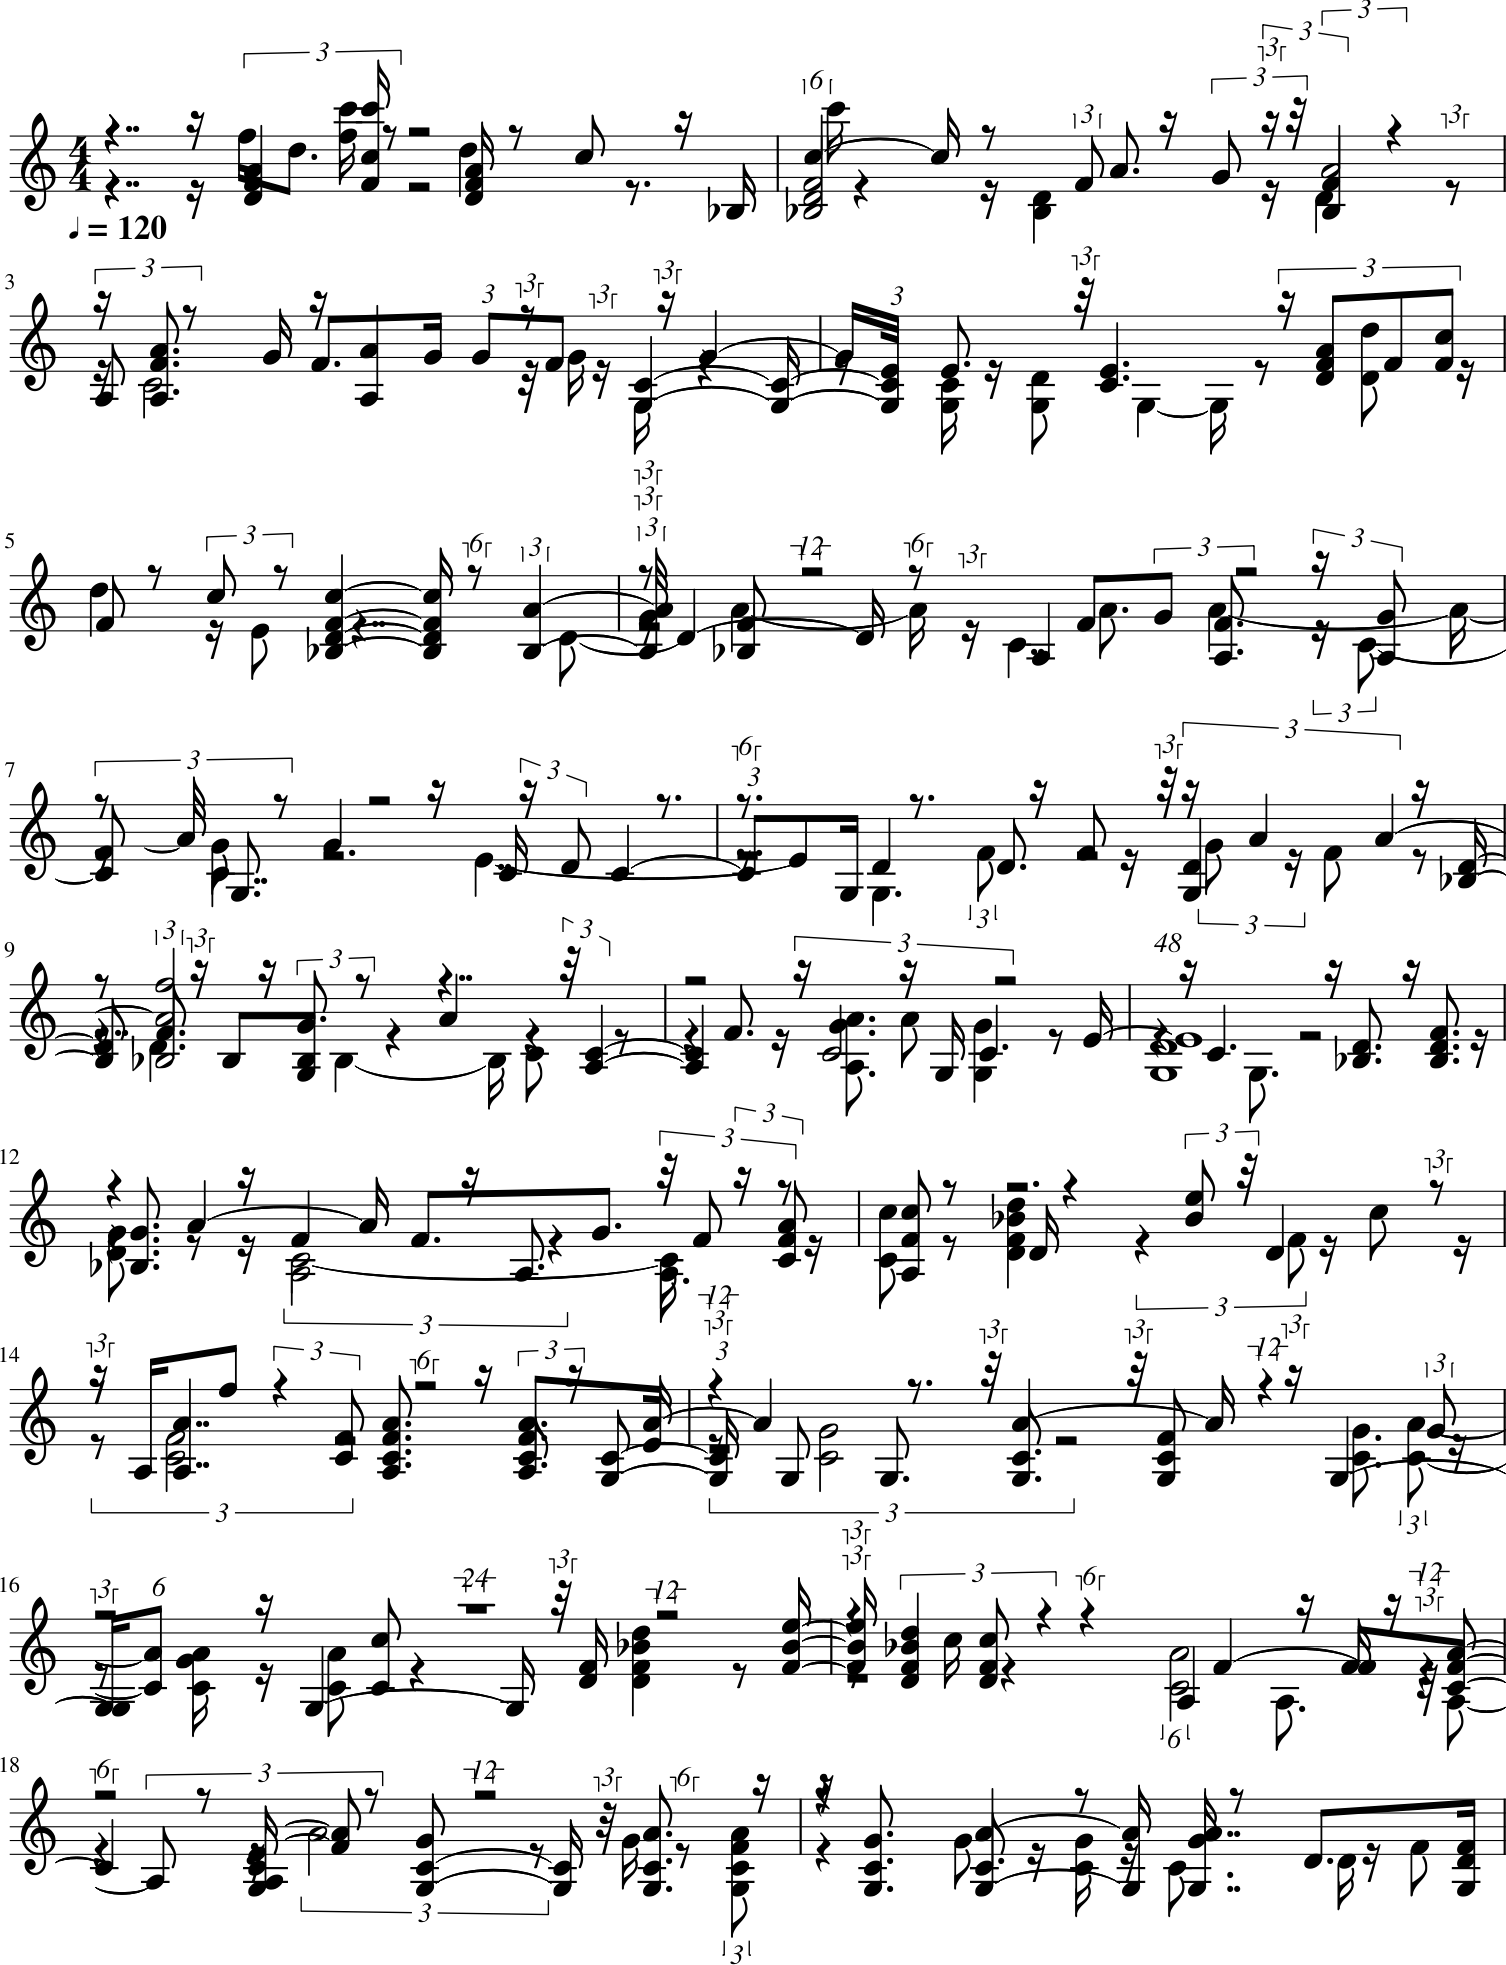

In [12]:
#Show the sheet music
parsed_paradise.show()